<a href="https://colab.research.google.com/github/annanya-mathur/Tensorflow/blob/main/3D_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graphs in Tensorflow**
>**Any operation in tensorflow is performed over Graph. Graphs are used to evalute variables over operations to get a specific value.**
  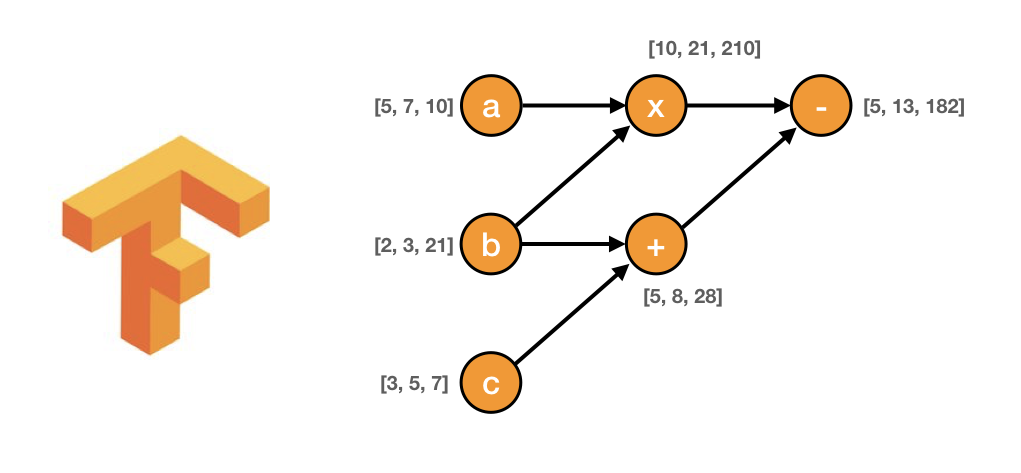
> **multiply: (a*b)**

> **sum: (b+c)**

> **subtract: (multiply — sum)**

# **Broadcasting Effect**

In [1]:
import tensorflow as tf
x=tf.constant([24,56,34])
y=tf.constant([50])
z=tf.constant([50,50,50])
print(tf.multiply(x,y))
print(tf.multiply(x,z))

tf.Tensor([1200 2800 1700], shape=(3,), dtype=int32)
tf.Tensor([1200 2800 1700], shape=(3,), dtype=int32)


> **Hence both the result  is same**

# **Session**
> **A session object encapsulates the environment in which Operations objects are executable and tensor objects are evalued . Its main propose is to evalute graph and output a value**

In [2]:
!pip install tensorflow==1.14..0
import tensorflow as tf

     |████████████████████████████████| 109.3MB 99kB/s 
     |████████████████████████████████| 491kB 47.1MB/s 
     |████████████████████████████████| 3.2MB 36.1MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [3]:
with tf.compat.v1.Session() as sess:
  x = tf.constant([1,2,3], dtype=tf.float32, name="x")
  print(sess.run(x))
  sess.close()

[1. 2. 3.]


# **ASSERT**

> **Python has built-in assert statement to use assertion condition in the program. assert statement has a condition or expression which is supposed to be always true. If the condition is false assert halts the program and gives an AssertionError.**

In [7]:
obj=tf.constant(89)
tf.compat.v1.disable_eager_execution()
assert obj.graph is tf.compat.v1.get_default_graph()
obj

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [11]:
g=tf.Graph()
with g.as_default():
  obj=tf.constant(89)
  assert obj.graph is g
  print(obj)

Tensor("Const:0", shape=(), dtype=int32)


# **Adding two variables over Graph**

In [13]:
a=90
b=89
c=tf.add(a,b,name='ADD')
print(c)

Tensor("ADD:0", shape=(), dtype=int32)


In [16]:
sess=tf.compat.v1.Session()
print(sess.run(c))

179


# 3D Matrix Operations
> **3d martix is a collection of 2d matrices with the order of (p,q,r)**
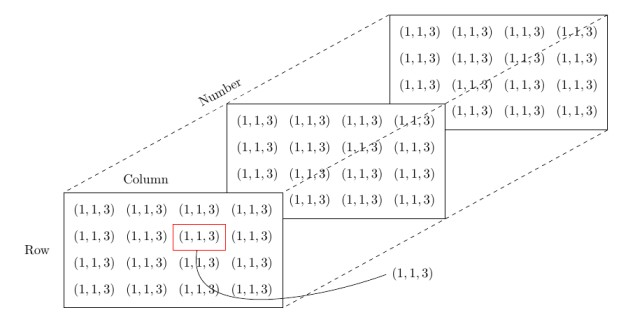

In [19]:
import numpy as np
np.random.randint(0,10,size=(5,3,2))

array([[[6, 3],
        [9, 9],
        [0, 2]],

       [[4, 3],
        [0, 8],
        [1, 2]],

       [[5, 8],
        [8, 3],
        [2, 5]],

       [[5, 1],
        [0, 0],
        [9, 7]],

       [[5, 5],
        [1, 6],
        [9, 2]]])

**Matmul( ) function takes matrix of rank >=2 . Get_collection( ) function always return an array that has been added to it.**

In [53]:
tf.compat.v1.reset_default_graph()
m1=tf.compat.v1.get_variable('m1',shape=(5,3,2))
m2=tf.compat.v1.get_variable('m2',shape=(5,2,4))
m3=tf.matmul(m1,m2,name='m3')
print(m3)
assert m3.shape == (5,3,4)
tf.compat.v1.add_to_collection('my_collection',m3)
assert m3 is tf.compat.v1.get_collection('my_collection')[0]

Tensor("m3:0", shape=(5, 3, 4), dtype=float32)


In [54]:
default_graph = tf.compat.v1.get_default_graph()
assert m1.graph is default_graph
assert m2.graph is default_graph
assert m3.graph is default_graph
assert m3 is default_graph.get_collection('my_collection')[0]
print ('The Assertion Passed')

The Assertion Passed


In [55]:
print(default_graph)

  